# DynaSent version 1: Round 1 and 2 comparative analyses

In [1]:
__author__ = 'Christopher Potts'

## Contents

## Set-up

In [2]:
import matplotlib.pyplot as plt
from nltk.metrics.distance import edit_distance
from nltk.tokenize.casual import TweetTokenizer
import os
import pandas as pd

import dynasent_utils as utils

In [3]:
plt.style.use("dynasent.mplstyle")

In [4]:
src_dirname = "dynasent-v1.1"

In [5]:
r1_filename = os.path.join(
    src_dirname, "dynasent-v1.1-round01-yelp-train.jsonl")

In [6]:
r2_filename = os.path.join(
    src_dirname, "dynasent-v1.1-round02-dynabench-train.jsonl")

## Merged DataFrame

In [7]:
tokenizer = TweetTokenizer(preserve_case=False)

### Round 1 set-up

In [8]:
r1 = utils.load_dataset(r1_filename)

In [10]:
r1_df = pd.DataFrame(r1)[['sentence']]

In [11]:
r1_df['prompt'] = 'Yelp'

In [12]:
r1_df['prompt_sentence'] = None

### Round 2 set-up

In [9]:
r2 = utils.load_dataset(r2_filename)

In [13]:
r2_df = pd.DataFrame(r2)

r2_df['prompt'] = r2_df['has_prompt'].apply(
    lambda x: 'Prompt' if x else 'No Prompt')

r2_df['prompt_sentence'] = r2_df['prompt_data'].apply(
    lambda x: x['prompt_sentence'] if x else x)

r2_df = r2_df[['sentence', 'prompt', 'prompt_sentence']]

### Merger

In [14]:
df = pd.concat((r1_df, r2_df))

In [15]:
df['str_length'] = df['sentence'].str.len()

In [16]:
df['tokens'] = df['sentence'].apply(tokenizer.tokenize)

In [17]:
df['token_length'] = df['tokens'].apply(lambda x: len(x))

## Prompt/Sentence edit distance

In [18]:
def normalized_edit_distance(row):
    p = row['prompt_sentence']
    s = row['sentence']
    dist = edit_distance(p, s)
    length = max([len(p), len(s)])
    return dist / length

In [19]:
has_prompt_df = r2_df[r2_df.prompt == 'Prompt'].copy()

In [20]:
has_prompt_df['edit_distance'] = has_prompt_df.apply(
    normalized_edit_distance, axis=1)

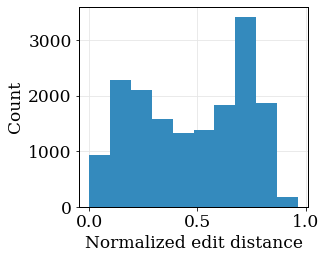

In [21]:
ax = has_prompt_df.edit_distance.hist(figsize=(5, 4), color="#348ABD")

ax.set_xlabel("Normalized edit distance")
ax.set_ylabel("Count")

plt.tight_layout()
plt.savefig(os.path.join('img', 'prompt-edit-distance.png'))

## Prompt length comparisons

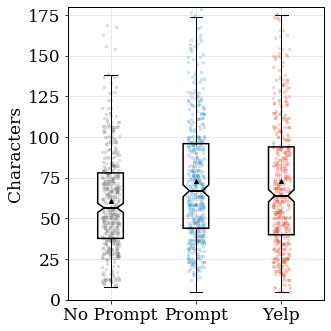

In [22]:
utils.prompt_cmp_plot(
    df,
    colname='str_length',
    ylabel='Characters',
    ylim=[0, 180],
    output_filename=os.path.join('img', 'prompt-lengths.png'))

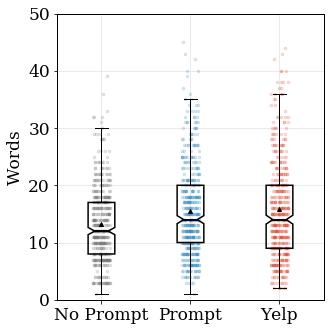

In [23]:
utils.prompt_cmp_plot(
    df,
    colname='token_length',
    ylabel='Words',
    ylim=[0, 50],
    output_filename=os.path.join('img', 'prompt-wc.png'))

## Vocab diversity experiments

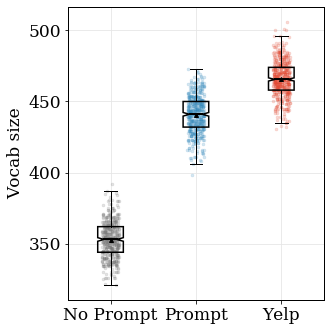

In [24]:
utils.vocab_diversity_experiments(
    df,
    output_filename=os.path.join('img', 'prompt-vocabs.png'))